<a href="https://colab.research.google.com/github/karolke99/nn_dl/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron - MNIST classification

Karol Waligora

## Scikit-learn approach

In [ ]:
# Import libraries

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Load MNIST dataset

mnist =  fetch_openml('mnist_784')
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

X /= 255.0

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


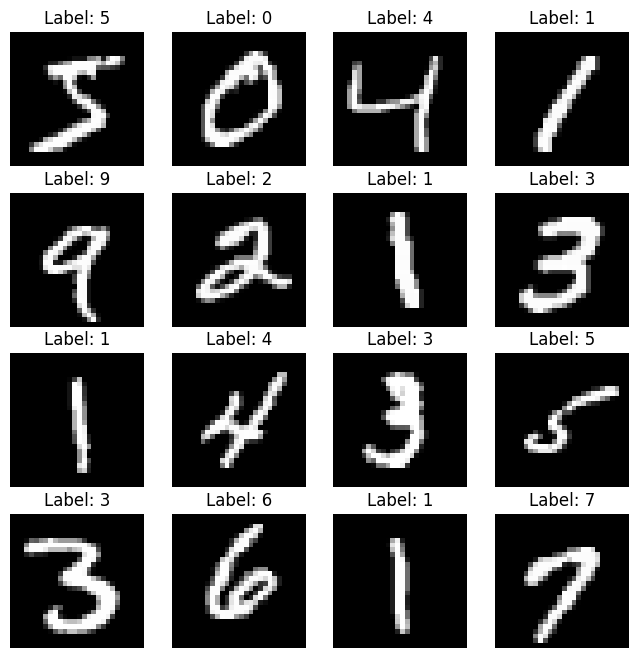

In [ ]:
# Plot samples
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X.iloc[i].to_numpy().reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')

plt.show()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize MLP Classifier

mlp = MLPClassifier(
    random_state=42,
    early_stopping=True,
    warm_start=True
)

# Train model
history = mlp.fit(X_train, y_train)

In [ ]:
# Predict on test set
y_pred = mlp.predict(X_test)

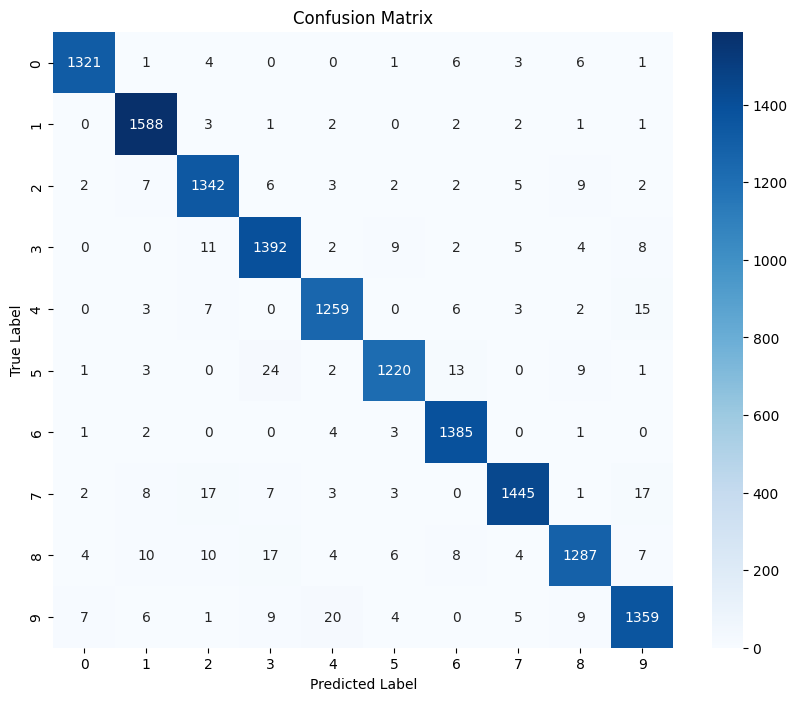

Accuracy: 0.9712857142857143


In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

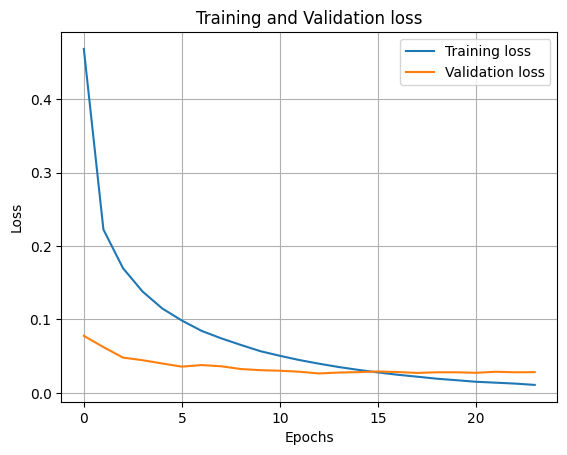

In [ ]:
plt.title('Training and Validation loss')
plt.plot(history.loss_curve_, label='Training loss')
plt.plot([1 - x for x in history.validation_scores_], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

## Keras approach

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

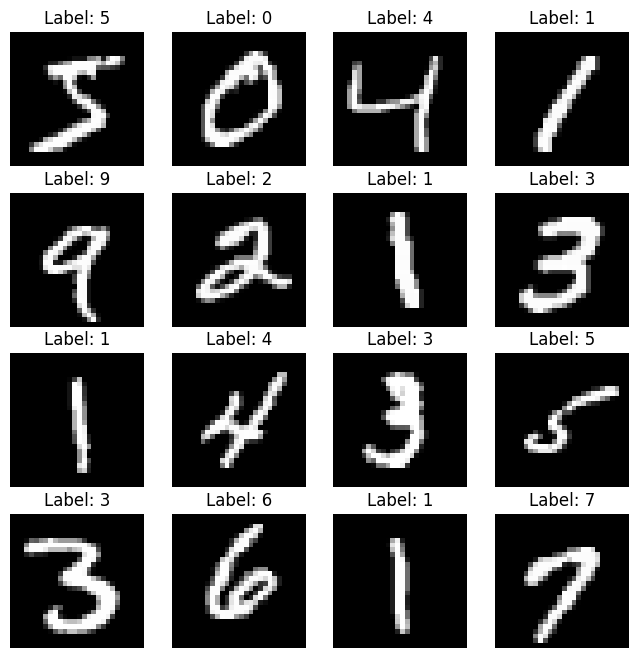

In [ ]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Plot samples from the training set
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

plt.show()

In [ ]:
# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build the Keras model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.1199 - val_accuracy: 0.9773
Epoch 2/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.1348 - val_accuracy: 0.9748
Epoch 3/100
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.1236 - val_accuracy: 0.9763
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.1451 - val_accuracy: 0.9735
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.1357 - val_accuracy: 0.9768
Epoch 6/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1452 - val_accuracy: 0.9734
Epoch 7/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.1347 - val_ac

In [ ]:
# Evaluate
loss, accuracy = model.evaluate(X_val, y_val)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

375/375 [==============================] - 1s 2ms/step - loss: 0.2567 - accuracy: 0.9759
Test loss: 0.25665101408958435
Test accuracy: 0.9759166836738586


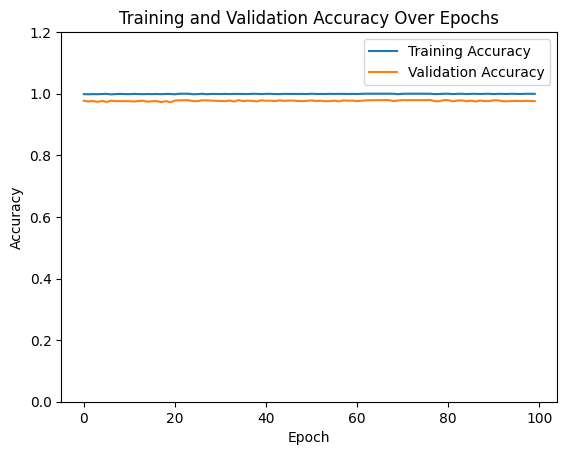

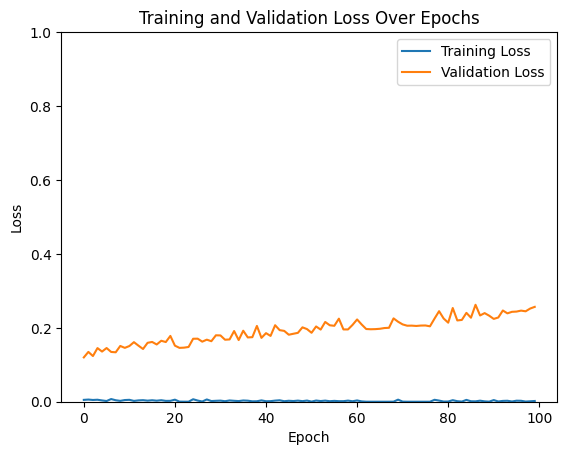

In [ ]:
# Plot training and validation errors
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1.2)
plt.legend()
plt.show()


# Plot training and validation errors
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [ ]:
# Test the model on the test set
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np
# Calculate accuracy
accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1))
print(f"Test Accuracy: {accuracy: }")

Test Accuracy:  0.9759


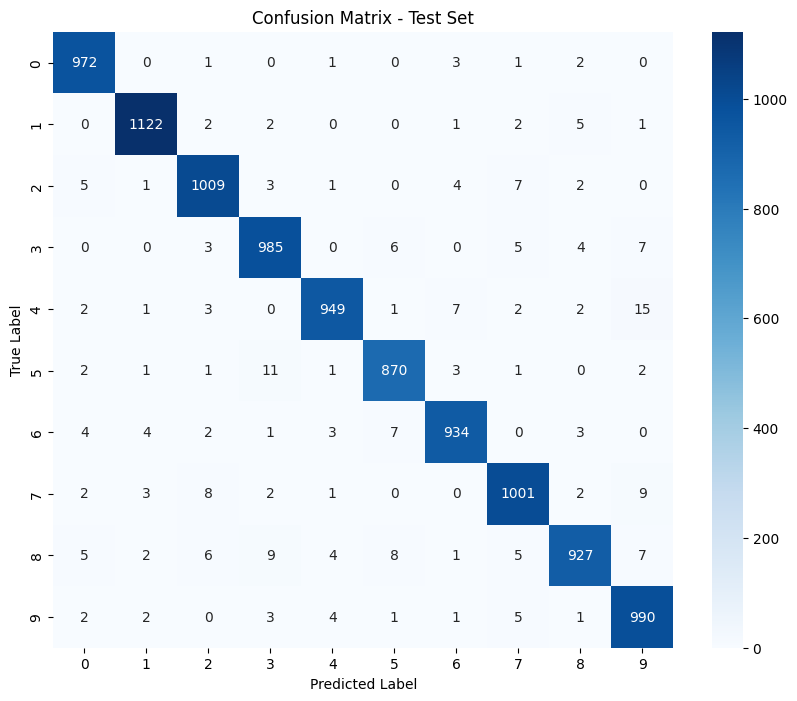

In [ ]:
# Generate and plot confusion matrix for the test set
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Summary

Following accuracy metrics were obtained for prepered models:
* `0.971` for scikit-learn model
* `0.976` for keras model

Model prepared in keras has slightly better accuracy than the one from scikit-learn.

## Comparison

*Scikit learn MLP* is easier for quick prototyping and simpler use cases. In this case it was easier to user scikit-learn MLP classifier. However is has slightly worse accuracy. The process of training model took less time than in the keras approach. It was harder to plot accuracy and loss over epochs since the model required additional parameters.

*Keras* is more flexible. It allows the construction of more complex models. It is better suited for large-scale datasets. It has hardoced number of epochs and the process of training took much more time. Even though the accuracy was better, the confusion matrix look worse than in MLPClassifier from scikit-learn.
